In [1]:
#import librari
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# baca file
file_path = 'sample_data/preprocessed_data_depresi (1).xlsx'
data = pd.read_excel(file_path)

In [5]:
#menampilkan data
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()


Dataset Head:
    id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3    

In [6]:
#menangani nilai kosong
data = data.fillna(data.median(numeric_only=True))

In [7]:
#encode kolom objek
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [8]:
#melatih model
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#model decision tree
print("\n=== Decision Tree Classifier ===")
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_model.fit(X_train, y_train)
dt_best_model = dt_model.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

print("Best Parameters:", dt_model.best_params_)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Test Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

cv_dt_scores = cross_val_score(dt_best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy (Decision Tree):", cv_dt_scores.mean())


=== Decision Tree Classifier ===
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8125783909693604
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2343
           1       0.86      0.82      0.83      3238

    accuracy                           0.81      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.82      0.81      0.81      5581

Cross-validation Accuracy (Decision Tree): 0.8257168458781361


In [12]:
#model Logistic Regression
print("\n=== Logistic Regression ===")
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
lr_model = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_param_grid, cv=5, scoring='accuracy')
lr_model.fit(X_train_scaled, y_train)
lr_best_model = lr_model.best_estimator_
lr_predictions = lr_best_model.predict(X_test_scaled)

print("Best Parameters:", lr_model.best_params_)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Test Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

cv_lr_scores = cross_val_score(lr_best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy (Logistic Regression):", cv_lr_scores.mean())


=== Logistic Regression ===
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Test Accuracy: 0.8364092456549006
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Cross-validation Accuracy (Logistic Regression): 0.8484767025089607


In [14]:
#Random Forest Classifier
print("\n=== Random Forest Classifier ===")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_model.fit(X_train, y_train)
rf_best_model = rf_model.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

print("Best Parameters:", rf_model.best_params_)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Test Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

cv_rf_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy (Random Forest):", cv_rf_scores.mean())



=== Random Forest Classifier ===
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.8299587887475363
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

Cross-validation Accuracy (Random Forest): 0.8474910394265234


In [ ]:
#perbandingan model
print("\nModel Comparison")
print("Decision Tree Test Accuracy:", dt_accuracy)
print("Logistic Regression Test Accuracy:", lr_accuracy)
print("Random Forest Test Accuracy:", rf_accuracy)


Model Comparison
Decision Tree Test Accuracy: 0.8125783909693604
Logistic Regression Test Accuracy: 0.8364092456549006
Random Forest Test Accuracy: 0.8299587887475363


Columns in the dataset: Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


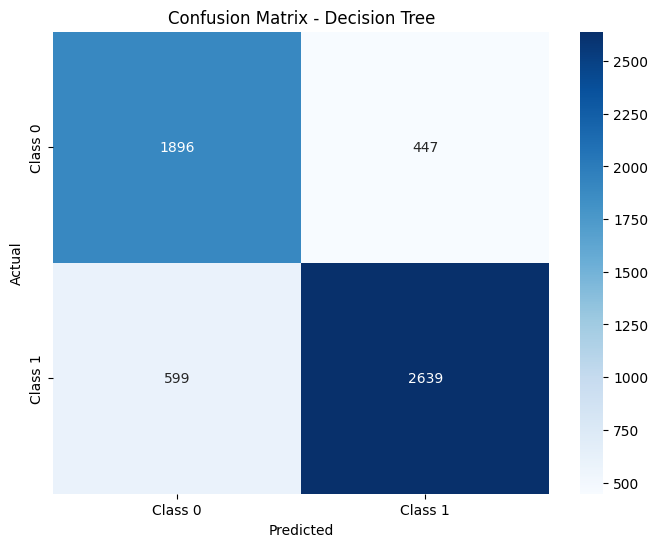

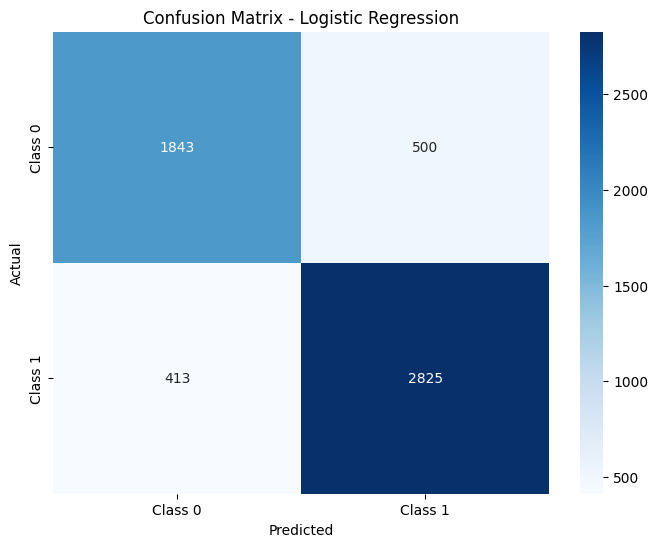

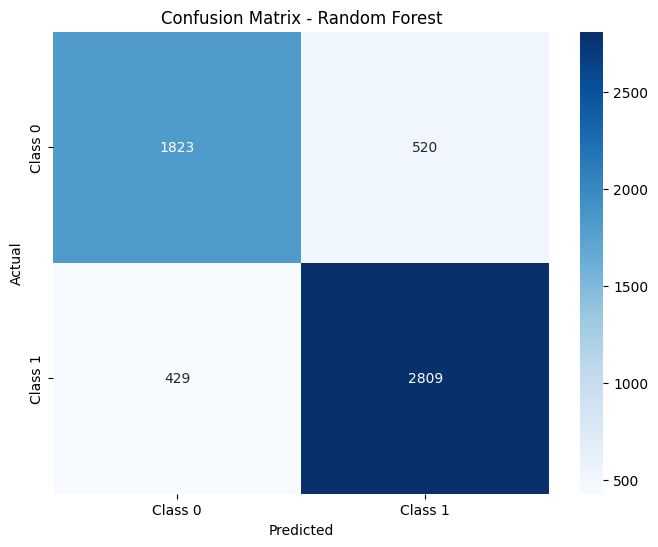

In [ ]:
#menampilkan visualisasi
print("Columns in the dataset:", data.columns)

target_column_name = 'Depression'

if target_column_name in label_encoders:
    labels = label_encoders[target_column_name].classes_
else:
    labels = ['Class 0', 'Class 1']

#Confusion Matrix - Decision Tree
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Confusion Matrix - Logistic Regression
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Confusion Matrix - Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#menyimpan data
results = pd.DataFrame(X_test)
results['Actual'] = y_test
results['Decision Tree Prediction'] = dt_predictions
results['Logistic Regression Prediction'] = lr_predictions

output_file_path = '/content/classification_results_with_features.csv'
results.to_csv(output_file_path, index=False)

print(f"Results saved to {output_file_path}")

Results saved to /content/classification_results_with_features.csv
